In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import scipy.special
# from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import cartopy
import cartopy.crs as ccrs

from colorsys import hls_to_rgb


def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg + np.pi)  / (2 * np.pi) + 0.5
    l = 1.0 - 1.0/(1.0 + np.power(r,1.0))#0.3))
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2) 
    return c


def plot_with_title(vals,order_num, degree_num , title_override=None,plot_real=False):
    if plot_real:
        vals = np.real(vals)
    plt.imshow(colorize(vals))
    if order_num is not None and degree_num is not None and title_override is None:
        text = r'$Y^{'+str(order_num)+r'}_{'+str(degree_num)+r'}$'
        plt.title(text)
    if title_override is not None: 
        plt.title(title_override)
    plt.gca().axes.get_xaxis().set_ticks([])
    plt.gca().axes.get_yaxis().set_ticks([])
    plt.axis('tight')
    return 

theta_vec = np.linspace(0.0,np.pi,180)#,dtype='complex64')
phi_vec = np.linspace(0.0,2*np.pi,360)#,dtype='complex64')

thetas, phis = np.meshgrid(theta_vec,phi_vec)

def get_real_harmonic_Y_m_l(order_num,degree_num,phis,thetas):
    val1 = scipy.special.sph_harm(order_num, degree_num, phis, thetas)     
    

    if order_num == 0: 
        return val1
    val2 = scipy.special.sph_harm(-order_num, degree_num, phis, thetas)     
    if order_num < 0:
        # Order -ve:
        return 1j*np.power(2,-0.5)*(val2-np.power(-1,order_num)*val1)
    else: 
        # Order +ve:
        return np.power(2,-0.5)*(val2+np.power(-1,order_num)*val1)       
    return

max_order = 5
plots_per_row = max_order*2+1




## Spherical Harmonics: 

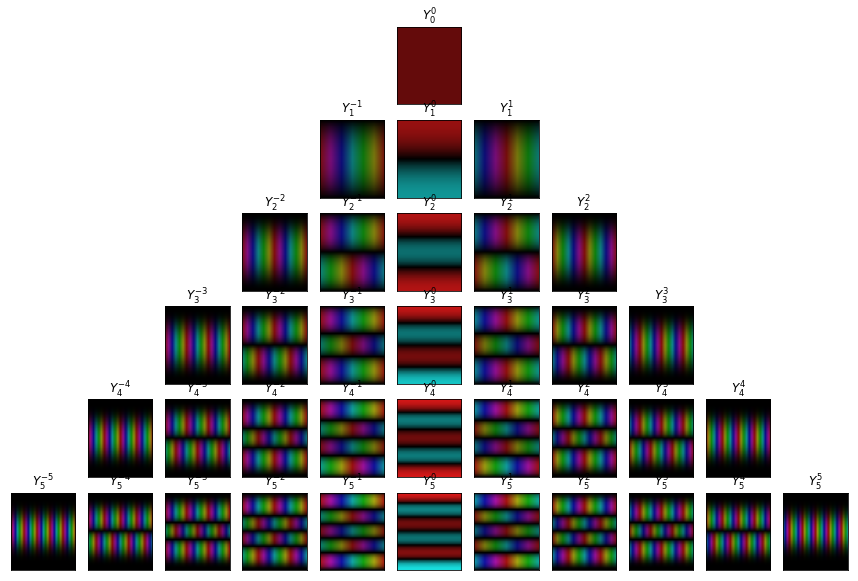

In [2]:
plt.figure(figsize=(15,10))
for degree_num in range(0,max_order+1):
    for temp,order_num in enumerate(range(-max_order,max_order+1)):
        if np.abs(order_num)<=degree_num:

            vals = scipy.special.sph_harm(order_num, degree_num, phis, thetas)     

            plt.subplot(max_order+1,plots_per_row,plots_per_row*degree_num+order_num+max_order+1)
            plot_with_title(vals,order_num, degree_num )            
plt.show()

## 'Real' Spherical Harmonics: 

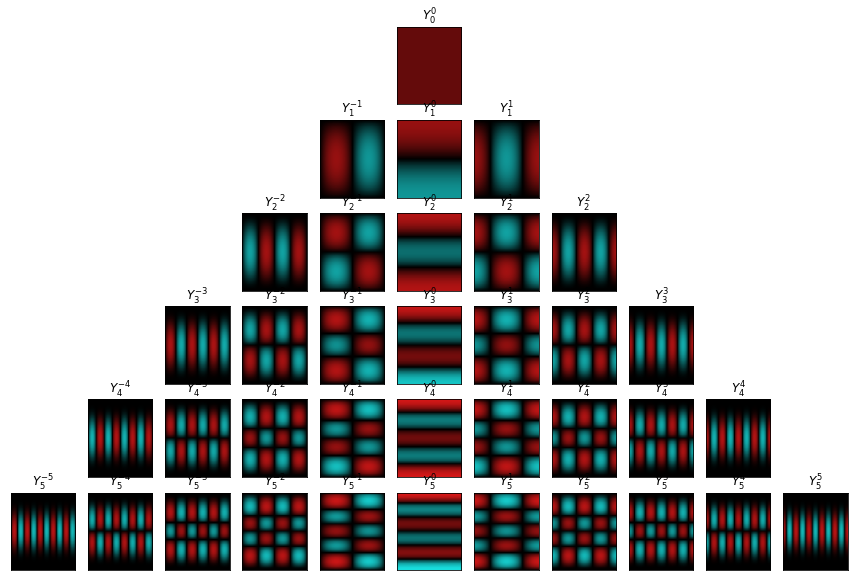

In [3]:
plt.figure(figsize=(15,10))
for degree_num in range(0,max_order+1):
    for temp,order_num in enumerate(range(-max_order,max_order+1)):
        if np.abs(order_num)<=degree_num:
            vals = get_real_harmonic_Y_m_l(order_num,degree_num,phis,thetas)

            plt.subplot(max_order+1,plots_per_row,plots_per_row*degree_num+order_num+max_order+1)
            plot_with_title(vals,order_num, degree_num )
plt.show()

## Save Rectilinear images for creating 3D models: 

In [4]:
theta_vec = np.linspace(0.0,np.pi,180*4)
phi_vec = np.linspace(0.0,2*np.pi,360*4)
thetas, phis = np.meshgrid(theta_vec,phi_vec)

def save_re_spherical_harmonics(degree_num,order_num):
    vals = get_real_harmonic_Y_m_l(order_num,degree_num,phis,thetas)
        
    im_out = colorize(vals)*256
    im_out = im_out.astype('int')
    plt.imsave(os.path.join('plots','re_Y'+str(degree_num)+'_'+str(order_num)+'equirectangular.png'),im_out)

for degree_num in range(0,4):
    for order_num in range(0,degree_num+1):    
        save_re_spherical_harmonics(degree_num,order_num)

# Converting to 'Gores' for photo printing: 
* Use website here: https://www.winski.net/globus-projector/simplified/ 
* Upload each image in turn, 'prepare image', then save the resultant file
* **You must resize the image before photo printing**
    

## Contour Diagrams (For pen plotting on the EggBot): 

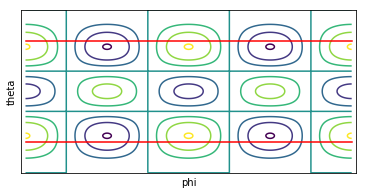

In [24]:

def do_contour_plot(order_num,degree_num,
                    filled=False,max_line_deg = None,
                    labels=False,save_plot=False):
    vals = np.real(get_real_harmonic_Y_m_l(order_num,degree_num,phis,thetas))
    if filled: 
        CS = plt.contourf(phis,thetas,vals)
    else:
        CS = plt.contour(phis,thetas,vals)
    if labels:
        plt.clabel(CS, inline=1, fontsize=10)
    if max_line_deg is not None: 
        max_line = (90-max_line_deg) / 360.0 * 2.0 * np.pi
        plt.plot([np.min(phis),np.max(phis)],[max_line,max_line],'r')
        plt.plot([np.min(phis),np.max(phis)],[np.pi-max_line,np.pi-max_line],'r')
    plt.gca().axes.get_xaxis().set_ticks([])
    plt.gca().axes.get_yaxis().set_ticks([])
    plt.axis('tight')
    plt.axis('equal')
    filename_base = "spherical_contour_Y" + str(order_num)+"_"+str(degree_num)
    if save_plot: 
        plt.savefig(os.path.join('plots','svgs',filename_base+".svg"), dpi=150)
        plt.savefig(os.path.join('plots',filename_base+".png"), dpi=150)

plt.figure(figsize=(6,3))
do_contour_plot(2,4,max_line_deg=56.0)
plt.xlabel('phi')
plt.ylabel('theta')
plt.show()

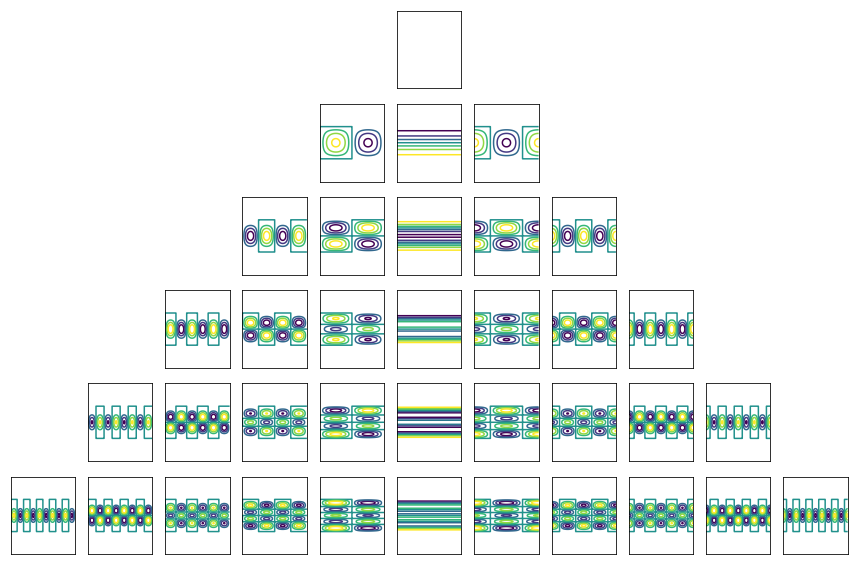

In [23]:
plt.close(plt.gcf())
plt.figure(figsize=(15,10))
for degree_num in range(0,max_order+1):
    for temp,order_num in enumerate(range(-max_order,max_order+1)):
        if np.abs(order_num)<=degree_num:

            plt.subplot(max_order+1,plots_per_row,plots_per_row*degree_num+order_num+max_order+1)
            do_contour_plot(order_num,degree_num)
plt.show()

In [25]:
for degree_num in range(0,max_order+1):
    for temp,order_num in enumerate(range(-max_order,max_order+1)):    
        if np.abs(order_num)<=degree_num:
            plt.close(plt.gcf())
            do_contour_plot(order_num,degree_num,save_plot=True,max_line_deg=56.0)
            

6.28318530718


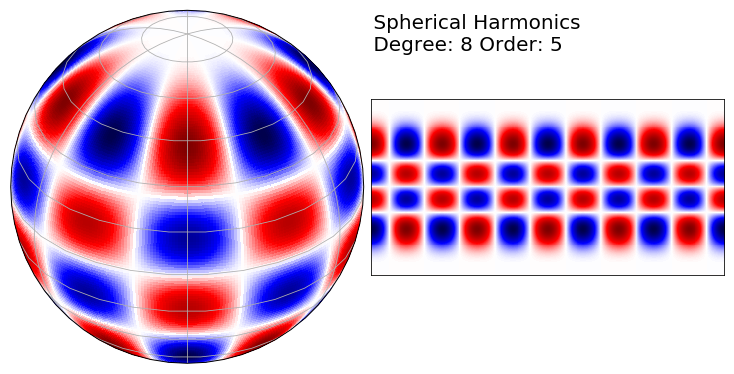

In [89]:
degree_num = 8
order_num = 5
vals = np.real(get_real_harmonic_Y_m_l(order_num,degree_num,phis,thetas))

#Set up figure
fig = plt.figure(figsize=(10,5),tight_layout = {'pad': 0})
inclination = 60 #degrees from pole
plotcrs = ccrs.Orthographic(0, 90 - inclination)
ax = plt.subplot(1,2,1,projection=plotcrs)
#Plot, limiting colors to extreme data values
vlim = np.max(np;9.abs(vals))
ax.pcolormesh(phis*360.0/2.0/np.pi,
              90-thetas*360.0/2.0/np.pi,
              vals,transform=ccrs.PlateCarree(),
                        cmap='seismic',vmin=-vlim,vmax=vlim)
ax.gridlines()

# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='gray', alpha=0.5, linestyle='--')
# Necessary function calls
ax.relim()
ax.autoscale_view()

plt.subplot(1,2,2)
plt.imshow((vals.transpose()),cmap='seismic')
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])

plt.suptitle(" Spherical Harmonics \n Degree: " + str(degree_num)+ " Order: " + str(order_num),
            fontsize=20.0,ha='left')
plt.show()

In [4]:
# Calculate DPI for printing 
input_res = 1440.0
output_diameter_mm = 80.0

output_width_mm = output_diameter_mm * np.pi
output_dpi = input_res /(output_width_mm / 25.4)
print "For ball diameter: " + str(output_diameter_mm)+ " and circumference: " + str(output_width_mm)
print "Require: " + str(output_dpi) + " dpi"


For ball diameter: 80.0 and circumference: 251.327412287
Require: 145.531279963 dpi
